

1:  What is Simple Linear Regression?

Ans:- Linear Regression is a statistical method that aims to establish a linear relationship between a single independent variable (predictor) and a single dependent variable (response) by fitting a straight line to data points. This "line of best fit" helps in predicting the value of the dependent variable based on the independent variable.
Applications: It is used for prediction, estimation, and understanding the relationship between two quantitative variables. For example, it can be used to predict house prices based on their size, or to analyze the relationship between mortality due to skin cancer and latitude.

 2: What are the key assumptions of Simple Linear Regression?

Ans:-Key Assumptions of Simple Linear Regression:
Linearity: There is a linear relationship between the independent variable (X) and the dependent variable (Y).
Independence of Errors: The residuals (errors) are independent of each other, meaning the error for one observation does not influence the error for another.
Homoscedasticity: The residuals have a constant variance across all levels of the independent variable. This means the spread of the errors should be consistent, not widening or narrowing as X changes.
Normality of Residuals: The residuals are normally distributed. This assumption is particularly important for small sample sizes and for reliable inference.

3: What is heteroscedasticity, and why is it important to address in regression models?

Ans:-Heteroscedasticity, also known as non-constant variance, refers to a situation in regression analysis where the variance of the residuals (or error terms) is not constant across all levels of the independent variable(s). This violates a key assumption of Ordinary Least Squares (OLS) regression, which presumes homoscedasticity (constant variance of residuals), and it is important to address because it leads to inefficient and unreliable regression coefficient estimates and invalid standard errors, making it difficult to trust the model's inferences and predictions.
Why it's important to address heteroscedasticity in regression models:
Inefficient Estimates: Heteroscedasticity causes the OLS estimates of the regression coefficients to be inefficient, meaning they are not the best possible unbiased estimates.
Invalid Standard Errors and Inferences: The presence of heteroscedasticity leads to invalid standard errors for the regression coefficients, which in turn makes hypothesis testing and confidence intervals unreliable.
Misleading Model Interpretation: When heteroscedasticity is present, the model may not accurately represent the true relationship between variables, leading to incorrect conclusions about the significance and impact of independent variables.
Poor Predictions: Because the model's assumptions are violated, the predictions generated by a heteroscedastic model may be less accurate.

Question 4: What is Multiple Linear Regression?

Ans:- Multiple Linear Regression (MLR) is a statistical method used to predict the value of a single dependent variable based on the values of two or more independent variables. It extends simple linear regression by incorporating multiple predictors to better understand how they collectively influence the outcome.
Purpose: MLR aims to model the linear relationship between a dependent variable and multiple independent variables, allowing for more accurate predictions and a deeper understanding of how various factors contribute to a particular outcome.
Applications: It is widely used in various fields like economics, finance, social sciences, and machine learning for tasks such as forecasting, trend analysis, and predictive modeling. For example, predicting housing prices based on square footage, location, and number of bedrooms, or analyzing how trading volume, P/E ratio, and inflation rate affect stock prices.

Question 5: What is polynomial regression, and how does it differ from linear regression?

Ans:-Polynomial regression is a statistical technique that models the relationship between an independent variable and a dependent variable as an nth-degree polynomial, allowing for the capture of non-linear patterns in data, unlike linear regression which assumes a straight-line relationship. While linear regression fits a straight line to the data, polynomial regression fits a curve by introducing higher-degree terms of the independent variable into the model.
Key differences between Polynomial Regression and Linear Regression:
Relationship Modeling: Linear regression models a linear relationship (a straight line), while polynomial regression models a non-linear relationship using a polynomial equation, fitting a curve to the data.
Flexibility: Polynomial regression is more flexible than linear regression, as it can capture complex, curvilinear relationships that linear regression cannot.















Slope (m): 1.980
Intercept (b): 0.180
Regression Equation: Y = 1.980X + 0.180


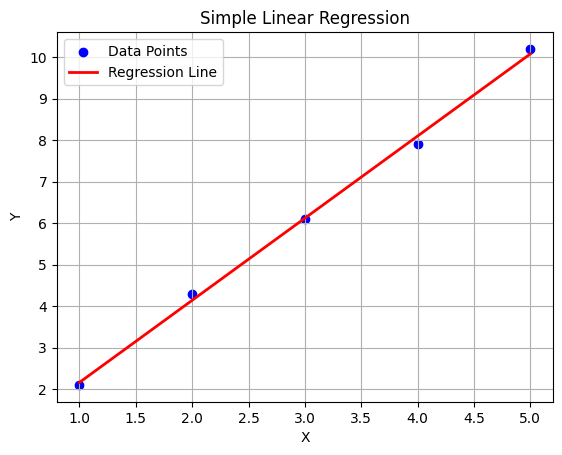

In [1]:
#Question 6:  Implement a Python program to fit a Simple Linear Regression model to the following sample data:
#● X = [1, 2, 3, 4, 5] ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points. (Include your Python code and output in the code box below.)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # reshape for sklearn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Get the regression line
Y_pred = model.predict(X)

# Print slope and intercept
print(f"Slope (m): {model.coef_[0]:.3f}")
print(f"Intercept (b): {model.intercept_:.3f}")
print(f"Regression Equation: Y = {model.coef_[0]:.3f}X + {model.intercept_:.3f}")

# Plot data points
plt.scatter(X, Y, color='blue', label="Data Points")

# Plot regression line
plt.plot(X, Y_pred, color='red', linewidth=2, label="Regression Line")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
#Question 7: Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000] ● Rooms = [2, 3, 3, 4] ● Price = [250000, 300000, 320000, 370000]
 #Check for multicollinearity using VIF and report the results. (Include your Python code and output in the code box below.)

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample Data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

# Independent variables (X) and dependent variable (y)
X = data[['Area', 'Rooms']]
y = data['Price']

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Print regression coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", list(zip(X.columns, model.coef_)))
print(f"Regression Equation: Price = {model.coef_[0]:.2f}*Area + {model.coef_[1]:.2f}*Rooms + {model.intercept_:.2f}")

# Add constant term for VIF calculation
X_with_const = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Intercept: 103157.89473684214
Coefficients: [('Area', np.float64(63.15789473684211)), ('Rooms', np.float64(34736.842105263146))]
Regression Equation: Price = 63.16*Area + 34736.84*Rooms + 103157.89

Variance Inflation Factor (VIF):
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


Polynomial Equation: Y = 0.200*X^2 + 1.940*X + 0.060


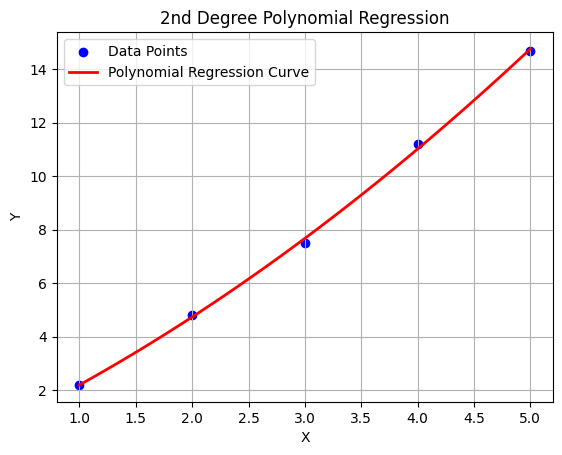

In [4]:
#Question 8:  Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5] 3 ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve. (Include your Python code and output in the code box below.)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values
Y_pred = model.predict(X_poly)

# Print the equation
coef = model.coef_
intercept = model.intercept_
print(f"Polynomial Equation: Y = {coef[2]:.3f}*X^2 + {coef[1]:.3f}*X + {intercept:.3f}")

# Plot data points
plt.scatter(X, Y, color='blue', label="Data Points")

# Plot regression curve
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
Y_range_pred = model.predict(poly.transform(X_range))
plt.plot(X_range, Y_range_pred, color='red', linewidth=2, label="Polynomial Regression Curve")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd Degree Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()


Slope: 1.150
Intercept: 6.500
Regression Equation: Y = 1.150*X + 6.500


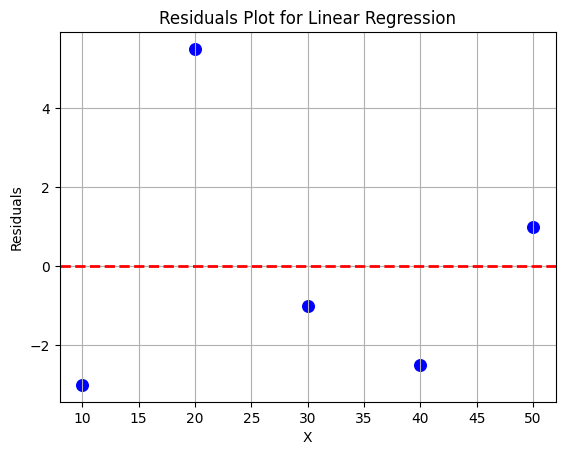

Observation: Residuals spread may suggest heteroscedasticity.


In [5]:
#Question 9: Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50] ● Y = [15, 35, 40, 50, 65]
#Assess heteroscedasticity by examining the spread of residuals. (Include your Python code and output in the code box below.)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Print regression equation
print(f"Slope: {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")
print(f"Regression Equation: Y = {model.coef_[0]:.3f}*X + {model.intercept_:.3f}")

# Residuals Plot
plt.scatter(X, residuals, color='blue', s=70)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Linear Regression")
plt.grid(True)
plt.show()

# Assess heteroscedasticity
if np.std(residuals[:len(residuals)//2]) != np.std(residuals[len(residuals)//2:]):
    print("Observation: Residuals spread may suggest heteroscedasticity.")
else:
    print("Observation: Residuals spread appears fairly constant (no strong heteroscedasticity).")


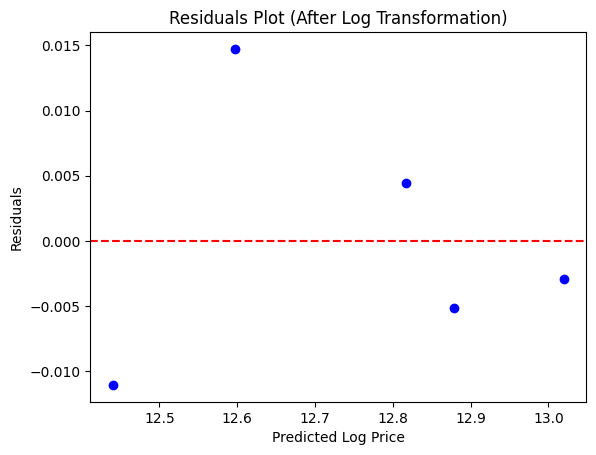

Variance Inflation Factor (VIF):
          Feature        VIF
0           const  92.210744
1            Area  11.142700
2           Rooms  11.596143
3  Location_Score   1.174656

Regression Equation (Log-Price):
Log(Price) = 11.5927 + 0.000629*Area + -0.016287*Rooms + 0.015734*Location_Score


In [6]:
#Question 10: Imagine you are a data scientist working for a real estate company.
 #You need to predict house prices using features like area, number of rooms, and location.
# However, you detect heteroscedasticity and multicollinearity in your regression model.
# Explain the steps you would take to address these issues and ensure a robust model.

"""answer:- To address heteroscedasticity, I would first confirm it through residual plots. If present, I’d apply a log transformation to the target variable or use Weighted Least Squares to stabilize variance. Additionally, I could use robust standard errors for reliable inference.
For multicollinearity, I would calculate the Variance Inflation Factor (VIF) and drop or combine highly correlated features. Alternatively, I could apply PCA or use Ridge/Lasso regression to reduce its effect.
Finally, I would validate the improved model using cross-validation to ensure robustness and, if regression assumptions remain violated, consider non-linear models like Random Forests."""

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example real estate dataset
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000, 2200],
    'Rooms': [2, 3, 3, 4, 5],
    'Location_Score': [8, 7, 9, 6, 8],
    'Price': [250000, 300000, 370000, 390000, 450000]
})

# -----------------------------
# 1. Handle Heteroscedasticity
# -----------------------------
# Apply log transform to Price
data['Log_Price'] = np.log(data['Price'])

# Define predictors and response
X = data[['Area', 'Rooms', 'Location_Score']]
y = data['Log_Price']

# Fit regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Residuals plot
residuals = y - y_pred
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Log Price")
plt.ylabel("Residuals")
plt.title("Residuals Plot (After Log Transformation)")
plt.show()

# 2. Check Multicollinearity
# Add constant for VIF calculation
X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

# 3. Print Regression Equation

print("\nRegression Equation (Log-Price):")
coef = model.coef_
intercept = model.intercept_
print(f"Log(Price) = {intercept:.4f} + {coef[0]:.6f}*Area + {coef[1]:.6f}*Rooms + {coef[2]:.6f}*Location_Score")
